<a href="https://colab.research.google.com/github/onurercen/workout_prediction_app/blob/main/RF_Workout_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest - Workout Type Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
print('RANDOM FOREST - WORKOUT TYPE')

RANDOM FOREST - WORKOUT TYPE


In [3]:
df['HR_per_minute'] = df['Avg_BPM'] / (df['Session_Duration (hours)'] * 60)
df['Intensity_per_Weight'] = df['Calories_Burned'] / df['Weight (kg)']
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']
df['Efficiency'] = df['Calories_Burned'] / df['Avg_BPM']
df['Experience_Adjusted_Calories'] = df['Calories_Burned'] / (df['Experience_Level'] + 1)
df['Anaerobic_Index'] = (df['Max_BPM'] - df['Avg_BPM']) / df['Resting_BPM']
df['BPM_Variance_Rest'] = (df['Avg_BPM'] - df['Resting_BPM']) ** 2
df['Heart_Instability'] = abs(df['Max_BPM'] - df['Avg_BPM']) / df['Max_BPM']

In [4]:
le_gender = LabelEncoder()
le_workout = LabelEncoder()
df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])
df['Workout_Encoded'] = le_workout.fit_transform(df['Workout_Type'])

In [5]:
feature_cols = [
    'Age', 'Gender_Encoded', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days/week)',
    'Fat_Percentage', 'Water_Intake (liters)', 'Experience_Level', 'BMI',
    'HR_per_minute', 'Intensity_per_Weight', 'HRR', 'Efficiency',
    'Experience_Adjusted_Calories', 'Anaerobic_Index', 'BPM_Variance_Rest', 'Heart_Instability'
]
X = df[feature_cols]
y = df['Workout_Encoded']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [7]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'Rastgele şans: 25%')

Test Accuracy: 0.2363 (23.63%)
Rastgele şans: 25%


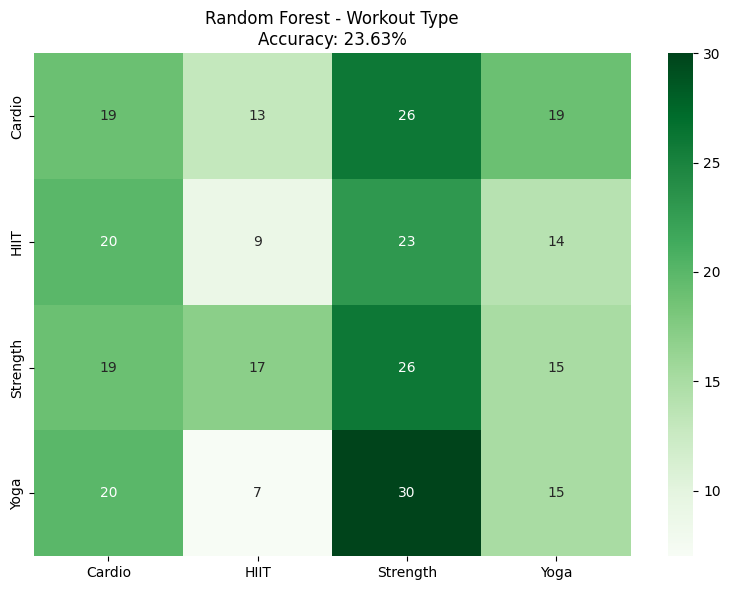

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le_workout.classes_, yticklabels=le_workout.classes_)
plt.title(f'Random Forest - Workout Type\nAccuracy: {test_acc:.2%}')
plt.tight_layout()
plt.savefig('rf_workout_confusion_matrix.png', dpi=150)
plt.show()

In [9]:
print(f'\nSONUÇ: Accuracy ({test_acc*100:.1f}%) ≈ Rastgele şans (25%)')


SONUÇ: Accuracy (23.6%) ≈ Rastgele şans (25%)


In [10]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf,           # RandomForestClassifier(...)
    X, y,         # tüm veri
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

print(f'CV Accuracy (mean): {cv_scores.mean():.4f}')
print(f'CV Accuracy (std):  {cv_scores.std():.4f}')
print(f'Fold scores: {np.round(cv_scores, 4)}')


CV Accuracy (mean): 0.2724
CV Accuracy (std):  0.0305
Fold scores: [0.3077 0.2615 0.2462 0.2371 0.3093]


RANDOM FOREST – WORKOUT TYPE PREDICTION
GENEL DEĞERLENDİRME
1) Model Performansı – Genel Bakış
Workout Type sınıflandırma probleminde Random Forest modeli, test doğruluğu ve çapraz doğrulama sonuçları açısından rastgele tahmin seviyesine yakın bir performans göstermiştir. Test seti üzerinde elde edilen doğruluk yaklaşık %23.6 iken, 5-fold Stratified Cross-Validation sonucunda ortalama doğruluk yaklaşık %27 olarak hesaplanmıştır. Bu değerler, modelin Workout Type sınıflarını anlamlı bir şekilde ayırt edemediğini göstermektedir.
2) Cross-Validation Sonuçlarının Yorumu
Stratified Cross-Validation sırasında farklı fold’lar arasında elde edilen doğruluk değerlerinin birbirine yakın olması, modelin belirli bir train-test ayrımına aşırı bağımlı olmadığını göstermektedir. Buna rağmen çapraz doğrulama performansının da düşük kalması, problemin veri bölünmesinden değil, problem tanımının kendisinden kaynaklandığını ortaya koymaktadır. Bu durum, modelin genelleme yeteneğinin sınırlı olduğunu ancak tutarlı bir şekilde düşük kaldığını göstermektedir.
3) Rastgele Tahmin ile Karşılaştırma
Bu problemde hedef değişken 4 farklı sınıftan oluşmaktadır. Dolayısıyla rastgele tahmin için beklenen doğruluk oranı yaklaşık %25’tir. Elde edilen test ve çapraz doğrulama doğruluklarının bu değere çok yakın olması, Random Forest modelinin mevcut özellikler kullanılarak Workout Type sınıflarını ayırt edemediğini açıkça göstermektedir.
4) Düşük Performansın Temel Nedenleri
Workout Type değişkeni, bireylerin tercihlerine ve davranışsal seçimlerine dayalı bir etiket olup; kalp atım hızı, yakılan kalori, seans süresi gibi fizyolojik ve seans bazlı özelliklerle doğrudan ve güçlü bir ilişki göstermemektedir. Aynı fizyolojik değerlere sahip bireylerin farklı workout türlerini tercih edebilmesi, sınıflar arasında yüksek örtüşmeye neden olmaktadır. Bu durum, makine öğrenmesi modelleri için ayırt edici bir örüntü oluşturmayı zorlaştırmaktadır.
5) Genel Sonuç ve Öneri
Sonuç olarak, Workout Type tahmini bu veri seti için uygun bir sınıflandırma problemi değildir. Model performansının düşük kalması, kullanılan algoritmanın yetersizliğinden ziyade hedef değişkenin mevcut özelliklerle zayıf ilişkili olmasından kaynaklanmaktadır. Aynı veri seti üzerinde Experience Level veya Workout Intensity gibi hedef değişkenlerin çok daha anlamlı ve yüksek performanslı sonuçlar verdiği gözlemlenmiştir. Bu çalışma, makine öğrenmesi projelerinde yalnızca model seçiminin değil, problem tanımının ve hedef değişkenin veri ile olan ilişkisinin de kritik önem taşıdığını göstermektedir.